# Facial Age Group Estimation Model

Our Facial Age Group Estimation Model is meticulously crafted to predict the age group of individuals using facial images.

The model features a custom Convolutional Neural Network (CNN) architecture, comprising 5 Convolutional Blocks and incorporating regularization techniques. It is designed to make predictions across 5 distinct age group labels.

#### The model was built through the following steps:

In [4]:
#### Step 1 - Importing Required Libraries
import numpy as np 
import pandas as pd
from glob import glob 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing import image
import os
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [6]:
#### Step 2 -  Data Directory and Configuration

# Define the paths to the train, test, and validation data
train_path = 'Faces_images/train'
test_path = 'Faces_images/test'
valid_path = 'Faces_images/validation'

# Get a list of folders in the train_path and sort them based on your desired order
folders = sorted(glob(os.path.join(train_path, '*')), key=lambda x: int(os.path.basename(x).split('-')[0]) if '-' in os.path.basename(x) else int(os.path.basename(x).split('+')[0]))

# Define the image size and Batch size
IMAGE_SIZE = [224, 224]
batch_size = 32

# Define the class labels based on your desired mapping
class_labels = ['0-3', '4+', '9+', '12+', '17+']


# Create a dictionary to store the count of images in each class
class_counts = {class_label: 0 for class_label in class_labels}

# Create a dictionary to store the one-hot encoding for each class
class_one_hot = {class_label: [int(class_label == label) for label in class_labels] for class_label in class_labels}

# Print the class labels, their one-hot encodings, and the image count
for class_label, hot_code in zip(class_labels, folders):
    image_count = len(os.listdir(hot_code))
    class_counts[class_label] = image_count
    print(f'Class Label: {class_label} - One-Hot Encoding: {class_one_hot[class_label]} - Hot Code: {hot_code} - Image Count: {image_count}')

# Print the count of images in each class
print("\nImage Counts in Each Class:")
for class_label, image_count in class_counts.items():
    print(f'{class_label}: {image_count} images')


Class Label: 0-3 - One-Hot Encoding: [1, 0, 0, 0, 0] - Hot Code: Faces_images/train/0-3 - Image Count: 2726
Class Label: 4+ - One-Hot Encoding: [0, 1, 0, 0, 0] - Hot Code: Faces_images/train/4+ - Image Count: 2728
Class Label: 9+ - One-Hot Encoding: [0, 0, 1, 0, 0] - Hot Code: Faces_images/train/9+ - Image Count: 2725
Class Label: 12+ - One-Hot Encoding: [0, 0, 0, 1, 0] - Hot Code: Faces_images/train/12+ - Image Count: 2721
Class Label: 17+ - One-Hot Encoding: [0, 0, 0, 0, 1] - Hot Code: Faces_images/train/17+ - Image Count: 2723

Image Counts in Each Class:
0-3: 2726 images
4+: 2728 images
9+: 2725 images
12+: 2721 images
17+: 2723 images


Found 13618 images belonging to 5 classes.
Found 1703 images belonging to 5 classes.
Found 1706 images belonging to 5 classes.


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_9 (Batc  (None, 112, 112, 64)     256 

2023-11-21 17:52:02.237988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


426/426 [==============================] - ETA: 0s - loss: 6.1664 - accuracy: 0.4155

2023-11-21 18:00:31.844091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


426/426 [==============================] - 528s 1s/step - loss: 6.1664 - accuracy: 0.4155 - val_loss: 3.6670 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 2/20
426/426 [==============================] - 525s 1s/step - loss: 2.5936 - accuracy: 0.4712 - val_loss: 2.4779 - val_accuracy: 0.3752 - lr: 0.0010
Epoch 3/20
426/426 [==============================] - 525s 1s/step - loss: 1.9701 - accuracy: 0.5153 - val_loss: 2.6414 - val_accuracy: 0.2149 - lr: 0.0010
Epoch 4/20
426/426 [==============================] - 553s 1s/step - loss: 2.0659 - accuracy: 0.5242 - val_loss: 2.4743 - val_accuracy: 0.4715 - lr: 0.0010
Epoch 5/20
426/426 [==============================] - 548s 1s/step - loss: 2.0451 - accuracy: 0.5264 - val_loss: 2.9405 - val_accuracy: 0.4198 - lr: 0.0010
Epoch 6/20
426/426 [==============================] - 555s 1s/step - loss: 2.2370 - accuracy: 0.4972 - val_loss: 2.9164 - val_accuracy: 0.3095 - lr: 0.0010
Epoch 7/20
426/426 [==============================] - 553s 1s/step - loss: 

2023-11-21 20:49:37.685634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


54/54 [==============================] - 19s 343ms/step - loss: 0.7703 - accuracy: 0.7538
Test Loss: 0.7703046202659607
Test Accuracy: 0.7538101077079773


2023-11-21 20:49:56.338873: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


54/54 [==============================] - 19s 358ms/step - loss: 0.7703 - accuracy: 0.7538
Test Loss: 0.7703047394752502
Test Accuracy: 0.7538101077079773
1/1 [==============================] - 0s 206ms/step


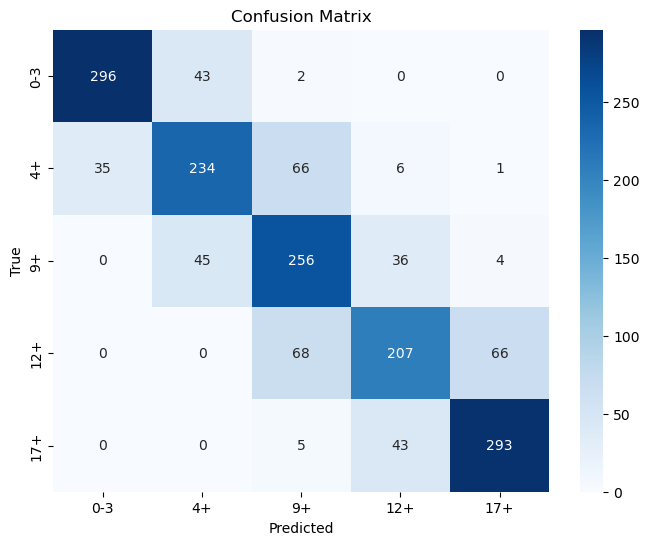

              precision    recall  f1-score   support

         0-3       0.89      0.87      0.88       341
          4+       0.73      0.68      0.70       342
          9+       0.64      0.75      0.69       341
         12+       0.71      0.61      0.65       341
         17+       0.80      0.86      0.83       341

    accuracy                           0.75      1706
   macro avg       0.76      0.75      0.75      1706
weighted avg       0.76      0.75      0.75      1706



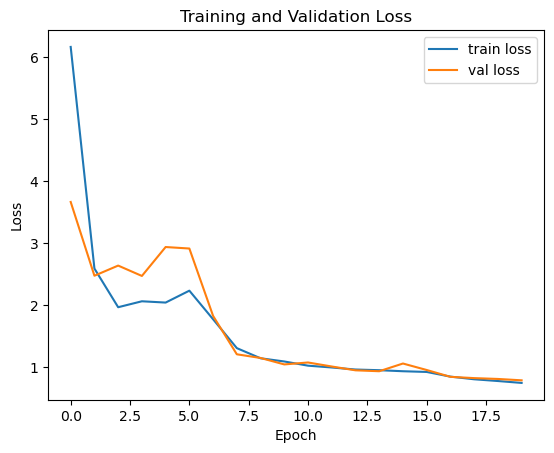

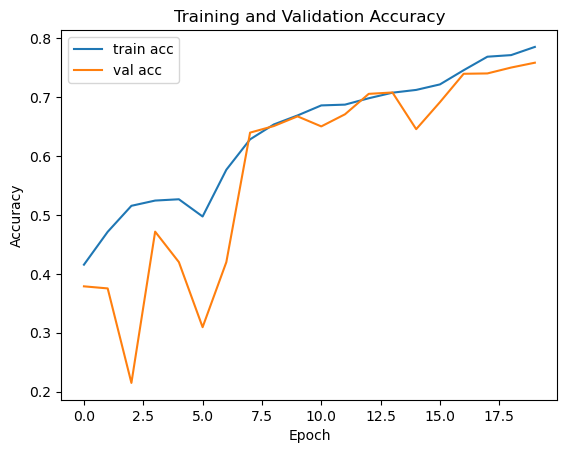

In [8]:
# Define the batch size 
batch_size = 32

#### Step 3 - Image Data Augmentation and Normalization and Loading for Training, Validation, and Test Sets

# Pixel Value Normalization , it rescales the pixel values so that they fall within the range [0, 1].
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)  
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



# Data Generators
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=IMAGE_SIZE,
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                classes=class_labels)

validation_set = validation_datagen.flow_from_directory(valid_path,
                                                       target_size=IMAGE_SIZE,
                                                       batch_size=batch_size,
                                                       class_mode='categorical',
                                                      classes=class_labels)

test_set = test_datagen.flow_from_directory(test_path,
                                           target_size=IMAGE_SIZE,
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                          classes=class_labels)


#### Step 4 - Building the CNN Model and compiling it and Early Stopping and Learning Rate Schedule 
# Building the model
input_layer = Input(shape=(224, 224, 3))

# Convolutional Block 1
x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Convolutional Block 2
x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Convolutional Block 3
x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# # Convolutional Block 4
x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
# Convolutional Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Flatten and Fully Connected Layers with Dropout
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output Layer
output_layer = Dense(5, activation='softmax')(x)

# Create the model
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compiling the Model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# Print the model summary
model.summary()

# Early Stopping and Learning Rate Schedule
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-7)

#### Step 5 - Training the Model

# Train the model
epochs = 20
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    validation_data=validation_set,
    validation_steps=len(validation_set),
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)

#### Step 6 - Evaluating the Model

# Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


#---------------------------------------------------------------------------------
# Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')



# Model Evaluation and Confusion Matrix

# Initialize variables to store true and predicted labels
true_labels = []
predicted_labels = []

# Loop through the test set and make predictions
for i in range(len(test_set)):
    images, labels = test_set[i]
    true_labels.extend(np.argmax(labels, axis=1))
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Convert the lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Create the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)


#### Step 7 - Plotting Loss and Accuracy Curves
# Plotting Loss Curves
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Plotting Accuracy Curves
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

#### Step 8- and the last one- Saving the Model
# Saving the Model
model.save('Facial_Age_Estimation_Model_E2.h5')

##### The model exhibits promising training progress, achieving an accuracy of around 75.3% on the test data, and this is the best result we got from the training on facial age-group estimation. Also,  this percentage in age-group estimation does very well since it is a complex and challenging task. The model is saved for use on Game Geek website.